In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [38]:
db = mysql.connector.connect(host = 'localhost',
                             username = 'root',
                             password = '?><Rahad1',
                             database = 'ecom')

In [39]:
mycursor = db.cursor()

query = "show tables"

mycursor.execute(query)

data = mycursor.fetchall()

for x in data:
    print(x)

('customers',)
('geolocation',)
('order_items',)
('orders',)
('payments',)
('products',)
('sellers',)


# Basic Queries

1. List all unique cities where customers are located.

In [40]:
mycursor = db.cursor()

query = "SELECT DISTINCT geolocation_city FROM geolocation"

mycursor.execute(query)

data = mycursor.fetchall()

# for x in data:
#     print(x)

data = pd.DataFrame(data, columns=['City'])
data

,City
0,sao paulo
1,sao bernardo do campo
2,jundiaí
3,taboão da serra
4,sãopaulo
...,...
5964,vila langaro
5965,ciriaco
5966,floriano peixoto
5967,erebango


2. Count the number of orders placed in 2017.

In [41]:
mycursor = db.cursor()

query = "SELECT COUNT(order_id) FROM orders \
        WHERE order_purchase_timestamp = 2017"

mycursor.execute(query)

data = mycursor.fetchall()

data[0][0]

45101

3. Find the total sales per category.

In [42]:
mycursor = db.cursor()

query = "SELECT products.product_category category, ROUND(SUM(payments.payment_value),2) sales \
        FROM products JOIN order_items \
        on products.product_id = order_items.product_id \
        join payments \
        on payments.order_id = order_items.order_id \
        GROUP BY category"

mycursor.execute(query)

data = mycursor.fetchall()

sales_per_ctg = pd.DataFrame(data, columns=['category','sales'])
sales_per_ctg

,category,sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


4. Calculate the percentage of orders that were paid in installments.

In [43]:
mycursor = db.cursor()

query = "SELECT sum(CASE WHEN payment_installments>1 THEN 1 ELSE 0 END)/count(*)*100 \
        FROM payments"

mycursor.execute(query)

data = mycursor.fetchall()

print("order paid in installment: ",data[0][0],"%")

order paid in installment:  49.4176 %


5. Count the number of customers from each state.

In [44]:
mycursor = db.cursor()

query = "SELECT customer_state, count(customer_id) \
        FROM customers \
        GROUP BY customer_state"

mycursor.execute(query)

data = mycursor.fetchall()

state_customer_count = pd.DataFrame(data, columns=['state','customer'])
state_customer_count = state_customer_count.sort_values(by='customer',ascending=False)
state_customer_count

,state,customer
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045
1,SC,3637
9,BA,3380
13,DF,2140
8,ES,2033
7,GO,2020


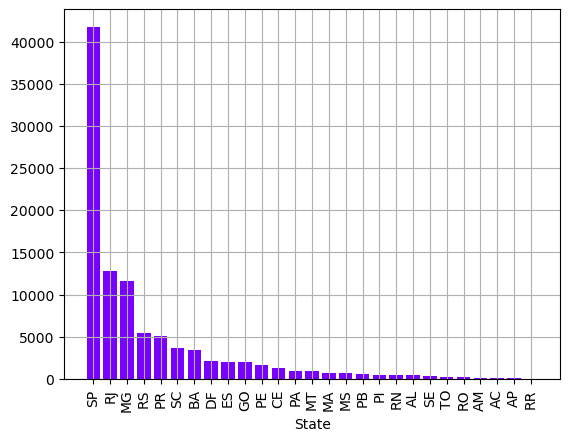

In [46]:
plt.bar(state_customer_count['state'],state_customer_count['customer'],color='#7700ff')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

# intermediate query

1. Calculate the number of orders per month in 2018.

In [ ]:
mycursor = db.cursor()

query = "SELECT MONTH(order_purchase_timestamp) AS `month`, \
    COUNT(order_id) AS `order` \
    FROM orders \
    WHERE YEAR(order_purchase_timestamp) = 2018 \
    GROUP BY MONTH(order_purchase_timestamp);"

mycursor.execute(query)

data = mycursor.fetchall()

order_month_2018 = pd.DataFrame(data, columns=['month','order'])
order_month_2018 = order_month_2018.sort_values(by='month', ascending=True)
order_month_2018

,month,order
5,1,7269
2,2,6728
4,3,7211
7,4,6939
6,5,6873
3,6,6167
0,7,6292
1,8,6512
8,9,16
9,10,4


<function matplotlib.pyplot.show(close=None, block=None)>

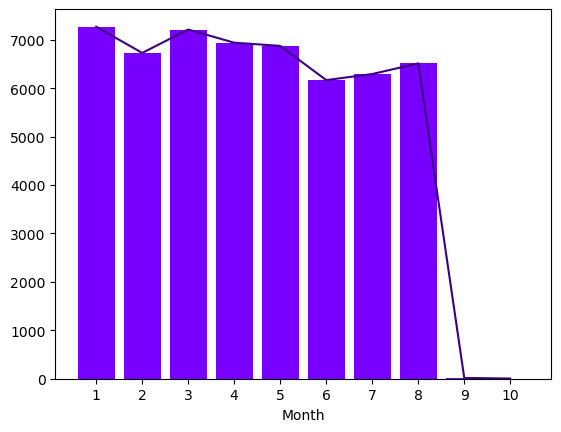

In [49]:
plt.bar(order_month_2018['month'],order_month_2018['order'],color='#7700ff')
plt.plot(order_month_2018['month'],order_month_2018['order'],color='#3c0080')
plt.xticks(order_month_2018['month'])
plt.xlabel('Month')
plt.show

2. Find the average number of products per order, grouped by customer city.

In [ ]:
mycursor = db.cursor()

query = "SELECT c.customer_city, round(AVG(oi.prod_count),2) as avg_prod_per_order \
        from orders o JOIN customers c  \
        ON o.customer_id = c.customer_id \
        JOIN \
            (SELECT order_id, count(*) as prod_count \
            from order_items \
            GROUP BY order_id) oi ON o.order_id = oi.order_id \
        GROUP BY c.customer_city"

mycursor.execute(query)

data = mycursor.fetchall()
data = pd.DataFrame(data)
data

,0,1
0,sao paulo,1.16
1,bage,1.05
2,macapa,1.15
3,sao vendelino,1.00
4,sao caetano do sul,1.11
...,...,...
4105,garruchos,1.00
4106,humberto de campos,1.00
4107,bela vista do maranhao,1.00
4108,cantanhede,1.00


3. Calculate the percentage of total revenue contributed by each product category.

In [ ]:
mycursor = db.cursor()

query = "SELECT products.product_category category, \
            round((sum(payments.payment_value)/(SELECT sum(payment_value) FROM payments))*100,2) percentage \
        FROM products JOIN order_items ON products.product_id=order_items.product_id \
        JOIN payments ON payments.order_id=order_items.order_id \
        GROUP BY category"
mycursor.execute(query)

data = mycursor.fetchall()
data = pd.DataFrame(data, columns=['category','percentage'])
data

,category,percentage
0,perfumery,3.17
1,Furniture Decoration,8.93
2,telephony,3.04
3,bed table bath,10.70
4,automotive,5.32
...,...,...
69,cds music dvds,0.01
70,La Cuisine,0.02
71,Fashion Children's Clothing,0.00
72,PC Gamer,0.01


4. Identify the correlation between product price and the number of times a product has been purchased.

In [ ]:
mycursor = db.cursor()

query = "SELECT p.product_id, oi.price, count(oi.order_id) p_count \
        FROM products p JOIN order_items oi \
        on p.product_id = oi.product_id \
        GROUP BY p.product_id, oi.price;"

mycursor.execute(query)

data = mycursor.fetchall()
data = pd.DataFrame(data, columns=['product_id','price','purchase_count'])
correlation = data['price'].corr(data['purchase_count'])
print(f"Correlation between product price and purchase count: {correlation:.4f}")

Correlation between product price and purchase count: -0.0442


5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [ ]:
mycursor = db.cursor()

query = "SELECT s.seller_id seller_id, round(sum(p.payment_value),2) total_revenue,\
        RANK() OVER (ORDER BY sum(p.payment_value) DESC) as revenue_rank \
        FROM sellers s JOIN order_items oi \
        on s.seller_id = oi.seller_id JOIN payments p \
        on oi.order_id = p.order_id \
        GROUP BY seller_id ORDER BY total_revenue DESC" 

mycursor.execute(query)

data = mycursor.fetchall()
data = pd.DataFrame(data, columns=['seller_id','total_revenue','revenue_rank'])
data

,seller_id,total_revenue,revenue_rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3091
3091,702835e4b785b67a084280efca355756,18.56,3092
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3093
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3094


# Advanced Queries

1. Calculate the moving average of order values for each customer over their order history.

In [ ]:
mycursor = db.cursor()

query = """SELECT x.customer_id, x.date, x.price, 
            ROUND(avg(x.price) OVER(PARTITION BY x.customer_id ORDER BY x.date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW),2) moving_avg
            FROM
                (select c.customer_id customer_id , o.order_id order_id, o.order_purchase_timestamp date, oi.price price
                FROM customers c JOIN orders o ON c.customer_id = o.customer_id 
                JOIN order_items oi ON o.order_id = oi.order_id 
                ) x
            ORDER BY x.customer_id"""
mycursor.execute(query)

data = mycursor.fetchall()
data = pd.DataFrame(data, columns=['customer_id','date','price','moving_avg'])
data

,customer_id,date,price,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,89.80,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,54.90,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,179.99,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,149.90,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,93.00,93.00
...,...,...,...,...
112645,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,54.90,54.90
112646,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,47.90,47.90
112647,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,199.90,199.90
112648,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,10.90,10.90


2. Calculate the cumulative sales per month for each year.

In [ ]:
mycursor = db.cursor()

query = """SELECT 
                x.year year,
                x.month month,
                x.payment payment,
                round(sum(x.payment) OVER(ORDER BY year,month),2) cumulative
            FROM
                (SELECT
                    YEAR(o.order_purchase_timestamp) year ,
                    MONTH(o.order_purchase_timestamp) month,
                    round(sum(p.payment_value),2) payment
                FROM
                    orders o 
                JOIN 
                    payments p on o.order_id = p.order_id 
                GROUP BY 
                    year, month
                ORDER BY
                    year, month) as x;"""
mycursor.execute(query)

data = mycursor.fetchall()
data = pd.DataFrame(data)
data

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


3. Calculate the year-over-year growth rate of total sales.

In [ ]:
mycursor = db.cursor()

query = """WITH yearly_sale AS (
                SELECT
                    YEAR(o.order_purchase_timestamp) AS sales_year,
                    ROUND(SUM(p.payment_value), 2) AS total_sales
                FROM 
                    orders o
                JOIN payments p ON o.order_id = p.order_id
                GROUP BY 
                    sales_year
                ORDER BY
                    sales_year
            )
            SELECT 
                sales_year,
                total_sales,
                LAG(total_sales, 1) OVER(ORDER BY sales_year) AS previous_year_sales,
                ROUND((total_sales - LAG(total_sales, 1) OVER(ORDER BY sales_year)) /
                    LAG(total_sales, 1) OVER(ORDER BY sales_year) * 100, 2) AS YoY
            FROM
                yearly_sale;"""
mycursor.execute(query)
data = mycursor.fetchall()
data = pd.DataFrame(data, columns=['year','sales','previous_year_sales','YoY'])
data

,year,sales,previous_year_sales,YoY
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.7
2,2018,8699763.05,7249746.73,20.0


4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [ ]:
mycursor = db.cursor()

query = """ with first_purchase AS(
                SELECT
                    customer_id,
                    MIN(order_purchase_timestamp) as first_date
                FROM
                    orders
                GROUP BY
                    customer_id
                ),
            subsequent_purchase AS(
                SELECT
                    o.customer_id,
                    o.order_purchase_timestamp,
                    fp.first_date ,
                    CASE 
                        WHEN o.order_purchase_timestamp > fp.first_date
                            AND o.order_purchase_timestamp <= DATE_ADD(fp.first_date, INTERVAL 6 MONTH)
                        THEN 1
                        ELSE 0
                    END AS within_6_month
                FROM
                    orders o
                JOIN
                    first_purchase fp ON o.customer_id = fp.customer_id
                ),
            retention AS(
                SELECT 
                    customer_id,
                    MAX(within_6_month) AS retain
                FROM 
                    subsequent_purchase
                GROUP BY 
                    customer_id
                )

            SELECT 
                ROUND(SUM(retain) / COUNT(*) * 100, 2) AS retention_rate
            FROM 
                retention;"""
mycursor.execute(query)
data = mycursor.fetchall()
data

[(Decimal('0.00'),)]

5. Identify the top 3 customers who spent the most money in each year.

In [ ]:
mycursor = db.cursor()

query = """ with customer_yearly_spend AS(
                SELECT
                    YEAR(o.order_purchase_timestamp) AS year,
                    o.customer_id AS customer_id,
                    ROUND(SUM(p.payment_value),2) AS spent
                FROM
                    orders o 
                JOIN 
                    payments p ON o.order_id = p.order_id 
                GROUP BY 
                    year,
                    customer_id
                ),
            ranked_customer AS (
                SELECT 
                    year,
                    customer_id,
                    spent,
                    RANK() OVER(PARTITION BY year ORDER BY spent DESC) AS spending_rank
                FROM
                    customer_yearly_spend
            )
            SELECT 
                year,
                customer_id,
                spent,
                spending_rank
            FROM 
                ranked_customer
            WHERE
                spending_rank <= 3
            ORDER BY 
                year,
                spending_rank;"""
mycursor.execute(query)
data = mycursor.fetchall()
data = pd.DataFrame(data, columns=['year','customer_id','spent','rank'])
data

,year,customer_id,spent,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3


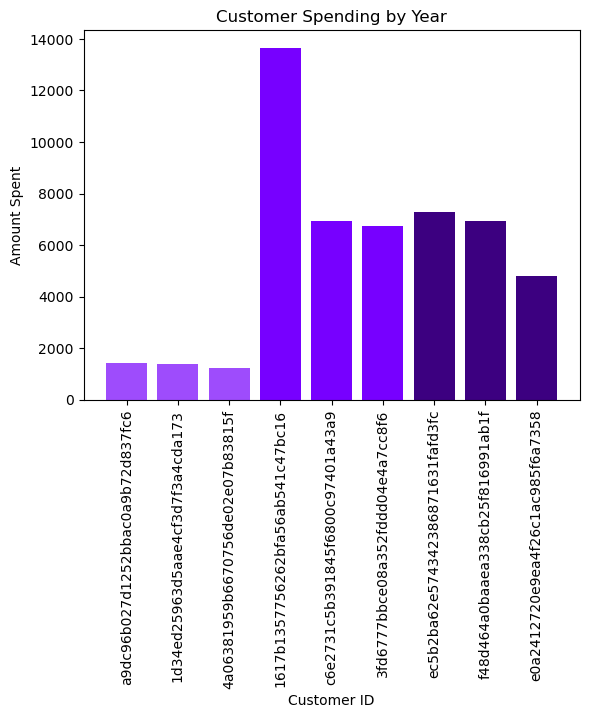

In [ ]:
color_map = {2016:'#9e4cfc',2017:'#7700ff',2018:'#3c0080'}
colors = data['year'].map(color_map)

plt.bar(data['customer_id'],data['spent'], color=colors)

plt.xlabel('Customer ID')
plt.ylabel('Amount Spent')
plt.title('Customer Spending by Year')
plt.xticks(rotation=90)

plt.show()
